In [73]:
import numpy as np
from sklearn.datasets import make_classification

#df,target = make_classification(n_samples = 100, n_features = 10,n_classes = 2)

In [260]:
import pandas as pd 

df = pd.read_csv('car.data',header= None)

df.columns = ['Price','Maintenance','doors','persons','boot_space','safety','target']

replace_dict = {'vhigh':4,'high':3,'med':2,'low':1}
boot_dict ={'small':1,'med':2,'big':3}
safety_dict = {'low':1,'med':2,'high':3}
target_dict = {'unacc':0,'acc':0,'good':1,'vgood':1}

df['Price'] = df['Price'].replace(replace_dict)
df['Maintenance'] = df['Maintenance'].replace(replace_dict)
df = df.replace({'5more':5,'more':5})
df['safety'] = df['safety'].replace(safety_dict)
df['boot_space'] = df['boot_space'].replace(boot_dict)
df['target'] = df['target'].replace(target_dict)
df = df.astype('int')

target = df['target']
df = df.drop(columns = ['target'])
columns = df.columns

target = np.array(target)
df = np.array(df)

In [7]:
# df = np.random.randint(0,100,size=(100, 4))
# target = np.random.randint(0,2,size = (100,1))

In [20]:
def return_value_counts(target):
    counts_dict = {}
    unique,counts  = np.unique(target,return_counts=True)
    for i,j in np.asarray((unique, counts)).T:
        counts_dict[i] = j
    return counts_dict

In [26]:
def calc_prob(counts_dict):
    prob_dict = {}
    total = 0
    for i in counts_dict:
        total += counts_dict[i]
    for i in counts_dict:
        prob_dict[i] = counts_dict[i]/total
    return prob_dict

In [27]:
calc_prob(counts_dict)

{0: 0.5, 1: 0.5}

In [76]:
counts_dict = return_value_counts(target)

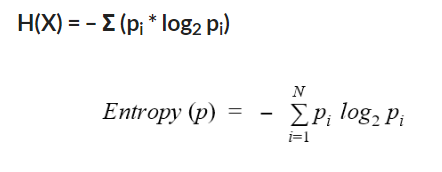

In [28]:
def entropy_calculation(target):
    prob_dict = calc_prob(return_value_counts(target))
    entropy = 0
    for i in prob_dict:
        entropy += -(prob_dict[i])*np.log2(prob_dict[i])
    return entropy

In [41]:
bin_col = np.where(col<30,True,False)

In [78]:
target[3]

1

In [79]:
def split_data(bin_col,col,target):
    first_split = []
    second_split = []
    for i in range(len(col)):
        if bin_col[i]:
            first_split.append([col[i],target[i]])
        else:
            second_split.append([col[i],target[i]])
    return first_split,second_split

In [54]:
entropy_calculation([i[1] for i in first_split])

0.9990102708804813

In [55]:
entropy_calculation([i[1] for i in second_split])

0.9998646331239298

In [191]:
col = df[:,3]
split_information_gain_dict = {}
target_entropy = entropy_calculation(target)
for i in np.unique(col[3:len(np.unique(col)-3)]):
    bin_col = np.where(col<i,True,False)
    left_split,right_split = split_data(bin_col,col,target)
    col_entropy = 0
    for sub in [left_split,right_split]:
        col_entropy += entropy_calculation([p[1] for p in sub])
    split_information_gain_dict[i] = target_entropy-col_entropy
    print('Information gain at split ',i,' ===',target_entropy - col_entropy)

Information gain at split  -2.242302689730259  === 0.0
Information gain at split  -1.7306948413410965  === 7.360063131400807e-05
Information gain at split  -1.71700665441949  === 0.00030045714348292396
Information gain at split  -1.6360018246814105  === -0.9182191670018163
Information gain at split  -1.607081326357743  === -1.0
Information gain at split  -1.6029761111040641  === -0.9708706652754642
Information gain at split  -1.536119422617491  === -1.0
Information gain at split  -1.5137430896855986  === -0.9851447320081803
Information gain at split  -1.4752448025386904  === -0.954093074594105
Information gain at split  -1.4643363206257256  === -0.9909889493395783
Information gain at split  -1.435862837886107  === -0.9705943441325247
Information gain at split  -1.3561956405486237  === -0.9448405397152086
Information gain at split  -1.318069614248751  === -0.9168049329721217
Information gain at split  -1.3022655117553816  === -0.9603787087147846
Information gain at split  -1.24321741260

In [248]:
def identify_best_split(col,target):
    split_information_gain_dict = {}
    target_entropy = entropy_calculation(target)
    for i in np.unique(col):
        if (i == max(col)) or (i == min(col)):
            pass
        else:
            bin_col = np.where(col<i,True,False)
            left_split,right_split = split_data(bin_col,col,target)
            col_entropy = 0
            for sub in [left_split,right_split]:
                col_entropy += entropy_calculation([p[1] for p in sub])
            split_information_gain_dict[i] = target_entropy-col_entropy
    try : 
        return max(split_information_gain_dict,key = split_information_gain_dict.get),split_information_gain_dict[max(split_information_gain_dict,key = split_information_gain_dict.get)]
    except: return -200,-150

In [183]:
split_info = [identify_best_split(df[:,i],target) for i in range(df.shape[1])]
print(np.argmax(np.array([split[1] for split in split_info])))

2


In [184]:
split_info[2][0]

0.3428085301991637

In [276]:
def best_col_to_split(df, target,min_information_gain):
    split_info = [identify_best_split(df[:,i],target) for i in range(df.shape[1])]
    best_col = np.argmax(np.array([split[1] for split in split_info]))
    if split_info[best_col][0] > min_information_gain:
        return best_col,split_info[best_col][0]
    else: 
        return -500,-500

In [124]:
col,split = best_col_to_split(df,target)

In [128]:
bin_col = np.where(df[:,col]<split,True,False)

In [132]:
len(target[~bin_col])

48

In [161]:
def split_total_data(col,split,df,target):
    bin_col = np.where(df[:,col]<split,True,False)
    left_data = df[bin_col]
    left_target = target[bin_col]
    right_data = df[~bin_col]
    right_target = target[~bin_col]
    return left_data,right_data,left_target,right_target
    

In [136]:
col,split = best_col_to_split(df,target)
left_data,left_target,right_data,right_target = split_total_data(col,split,df,target)

In [165]:
splitted_target

[array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1]),
 array([1]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0]),
 array([], dtype=int32),
 array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1

In [326]:
def build_decision_tree(df,target,max_depth,min_samples_split,min_information_gain):
    splitted_data = []
    splitted_target = []
    leaf_data = []
    leaf_target = []
    tracker = []
    tree_list = []
    for depth in range(max_depth+1):
        if depth == 0:
            splitted_data.append(df)
            splitted_target.append(target)
        #print(count,len(splitted_data))
        elif depth == max_depth:
            leaf_data.extend(splitted_data)
            leaf_target.extend(splitted_target)
            break
        temp_data = []
        temp_target = []
        count = 0
        print('Depth Value is at ', depth)
        print('Length of all sub dataframes at this depth is:::',[len(i) for i in splitted_target])
        for i in range(len(splitted_data)):
            if len(splitted_data[i]) > min_samples_split:
                col,split = best_col_to_split(splitted_data[i],splitted_target[i],min_information_gain)
                if (col == -500) & (split == -500):
                    print('Split isnt possible because of no information gain')
                    count += 1
                    leaf_data.append(splitted_data[i])
                    leaf_target.append(splitted_target[i]) 
                    #tracker[depth].append([leaf_data,leaf_target])
                else:
                    print('The Current Split is at column:: ',col,' and splitting at ', split)
                    left_data,right_data,left_target,right_target = split_total_data(col,split,splitted_data[i],splitted_target[i])
                    print('Instances in left node is::',len(left_target))
                    print('Instances in right node is::',len(right_target))
                    temp_data.append(left_data)
                    temp_data.append(right_data)
                    temp_target.append(left_target)
                    temp_target.append(right_target)
                    tree_list.append([depth,count,col,split])
                    tracker.append([depth,count,col,split,'Yes',left_data,left_target])
                    tracker.append([depth,count,col,split,'No',right_data,right_target])
            else: 
                leaf_data.append(splitted_data[i])
                leaf_target.append(splitted_target[i])
                #tracker[depth].append([col,split])
            count += 1
        splitted_data = temp_data
        splitted_target = temp_target
        print(len(splitted_data))
    return tracker,tree_list

In [316]:
tracker,tree_map = build_decision_tree(df,target,5,30,0.005)

Depth Value is at  0
Length of all sub dataframes at this depth is::: [1728]
The Current Split is at column::  3  and splitting at  4
Instances in left node is:: 576
Instances in right node is:: 1152
2
Depth Value is at  1
Length of all sub dataframes at this depth is::: [576, 1152]
The Current Split is at column::  0  and splitting at  2
Instances in left node is:: 144
Instances in right node is:: 432
The Current Split is at column::  5  and splitting at  2
Instances in left node is:: 384
Instances in right node is:: 768
4
Depth Value is at  2
Length of all sub dataframes at this depth is::: [144, 432, 384, 768]
The Current Split is at column::  1  and splitting at  2
Instances in left node is:: 36
Instances in right node is:: 108
The Current Split is at column::  0  and splitting at  3
Instances in left node is:: 144
Instances in right node is:: 288
The Current Split is at column::  0  and splitting at  2
Instances in left node is:: 96
Instances in right node is:: 288
The Current Spl

In [338]:
def next_conditions(depth,count,satisfied):
    if satisfied == 'No':
        return depth+1,2*count+1
    else:
        return depth +1,(2*count)

In [339]:
next_conditions(0,0,'No')

(1, 1)

In [325]:
tree_map = np.array(tree_map)
tree_map[:,0]

array([0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4], dtype=int64)

In [331]:
tree_map

array([[ 0,  0,  3,  4],
       [ 1,  0,  0,  2],
       [ 1,  1,  5,  2],
       [ 2,  0,  1,  2],
       [ 2,  1,  0,  3],
       [ 2,  2,  0,  2],
       [ 2,  3,  0,  3],
       [ 3,  0,  2,  3],
       [ 3,  1,  1,  3],
       [ 3,  2,  1,  2],
       [ 3,  3,  1,  2],
       [ 3,  4,  1,  2],
       [ 3,  5,  0,  3],
       [ 3,  6,  1,  3],
       [ 3,  7,  1,  2],
       [ 4,  2,  2,  3],
       [ 4,  3,  2,  3],
       [ 4,  4,  2,  3],
       [ 4,  5,  1,  3],
       [ 4,  6,  2,  3],
       [ 4,  7,  1,  3],
       [ 4,  9,  1,  3],
       [ 4, 10,  1,  2],
       [ 4, 11,  1,  2],
       [ 4, 12,  4,  2],
       [ 4, 13,  4,  2],
       [ 4, 14,  2,  3],
       [ 4, 15,  1,  3]], dtype=int64)

In [293]:
for i in tracker: print(i[0],i[1],i[2])

3 4 Yes
3 4 No
0 2 Yes
0 2 No
5 2 Yes
5 2 No
1 2 Yes
1 2 No
0 3 Yes
0 3 No
0 2 Yes
0 2 No
0 3 Yes
0 3 No
2 3 Yes
2 3 No
1 3 Yes
1 3 No
1 2 Yes
1 2 No
1 2 Yes
1 2 No
1 2 Yes
1 2 No
0 3 Yes
0 3 No
1 3 Yes
1 3 No
1 2 Yes
1 2 No
2 3 Yes
2 3 No
2 3 Yes
2 3 No
2 3 Yes
2 3 No
1 3 Yes
1 3 No
2 3 Yes
2 3 No
1 3 Yes
1 3 No
1 3 Yes
1 3 No
1 2 Yes
1 2 No
1 2 Yes
1 2 No
4 2 Yes
4 2 No
4 2 Yes
4 2 No
2 3 Yes
2 3 No
1 3 Yes
1 3 No


In [249]:
best_col_to_split(splitted_data[0],splitted_target[0])

(0, 2)

In [243]:
identify_best_split(splitted_data[0][:,0],splitted_target[0])

(3, -0.2638953344459123)

In [241]:
splitted_data[1]

array([[4, 4, 2, 4, 1, 1],
       [4, 4, 2, 4, 1, 2],
       [4, 4, 2, 4, 1, 3],
       ...,
       [1, 1, 5, 5, 3, 1],
       [1, 1, 5, 5, 3, 2],
       [1, 1, 5, 5, 3, 3]])

In [342]:
from scipy import stats

stats.mode([1,3,5])

ModeResult(mode=array([1]), count=array([1]))